<a href="https://colab.research.google.com/github/Pumafi/geostats_deep_learning/blob/main/Corrections/TP_Intro_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction to Keras

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt

In [2]:


RUNNING_IN_COLAB = True

if RUNNING_IN_COLAB:
    # Uses a private Auth Token, giving read and write access to repo
    # TO DELETE IF REPO GOES PUBLIC
    REPO_URL = 'https://github.com/Pumafi/geostats_deep_learning.git'
    BRANCH   = 'main'
    REPO_DIR = 'geostats_deep_learning'

    from pathlib import Path

    %cd /content

    if Path(REPO_DIR).is_dir():
      !rm -rf {REPO_DIR}

    # Download the repository
    if not Path(REPO_DIR).is_dir():
        !git clone --branch {BRANCH} --depth=1 -- {REPO_URL} {REPO_DIR}
    
    %cd {REPO_DIR}



/content
Cloning into 'geostats_deep_learning'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 27 (delta 5), reused 16 (delta 4), pack-reused 0
Unpacking objects: 100% (27/27), done.
/content/geostats_deep_learning


### **Keras**

Keras is a high level Deep Learning Python library.

The main idea behind the Keras Deep Learning lib is that a deep learning model is usually a **directed acyclic graph (DAG) of layers**.

Using the different available API, you will be able to build those *graphs of layers.*

#### Layers



##### Fully Connected Layers

In [23]:
!keras.layers.Dense?

In [4]:
output_size=128
activation='sigmoid'

fc = keras.layers.Dense(output_size, activation='sigmoid')

In [5]:
# %load Corrections/keras_corr_1.py

##### Convolutional Layers

In [6]:
!keras.layers.Conv2D?

In [7]:
output_features=128
kernel_size=(3, 3)
activation='sigmoid'

conv = keras.layers.Conv2D(output_features, kernel_size=kernel_size, activation=activation)

In [8]:
# %load Corrections/keras_corr_2.py

#### Functional API

The Keras functional API is a way to create models that are more flexible than the tf.keras.Sequential API.

The functional API can handle models with non-linear topology, shared layers, and even multiple inputs or outputs.

To demonstrate consider the following code, defining a very simple Fully Connected model.

In [9]:
inputs = keras.Input(shape=(50,))

# In the Fonctional API, the next layer is defined using LayerClass(*args)(last_layer_outputs)
y = keras.layers.Dense(128, activation="sigmoid", name="layer1")(inputs)
outputs = keras.layers.Dense(32, activation="softmax", name="output")(y)

At this point you can create the Model by specifying the inputs and outputs in the graph of layers


In [10]:
!keras.Model?

In [11]:
model = keras.Model(inputs=inputs, outputs=outputs, name="model")

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50)]              0         
                                                                 
 layer1 (Dense)              (None, 128)               6528      
                                                                 
 output (Dense)              (None, 32)                4128      
                                                                 
Total params: 10,656
Trainable params: 10,656
Non-trainable params: 0
_________________________________________________________________


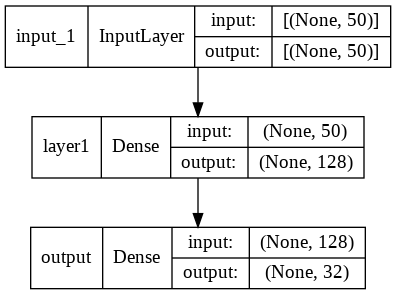

In [12]:
keras.utils.plot_model(model, "model.png", show_shapes=True)

#### Sequential API

A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

Let's define the same model as before but using this new API.

In [13]:
!keras.Sequential?

In [14]:
# Define Sequential model with 2 layers
model = keras.Sequential(
    [
        keras.layers.Dense(128, activation="sigmoid", name="layer1"),
        keras.layers.Dense(32, activation="softmax", name="output"),
    ]
)
# Call model on a test input
x = tf.ones((1, 50))
y = model(x)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (1, 128)                  6528      
                                                                 
 output (Dense)              (1, 32)                   4128      
                                                                 
Total params: 10,656
Trainable params: 10,656
Non-trainable params: 0
_________________________________________________________________


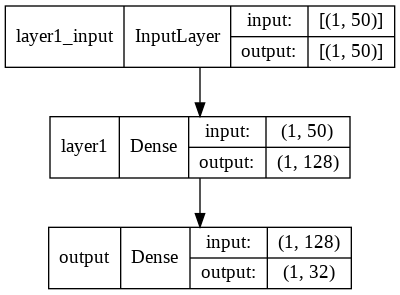

In [16]:
keras.utils.plot_model(model, "model.png", show_shapes=True)

#### Exercise 1 : Simple Feed Forward Network

Create a simple feed forward that takes a flattened MNIST input (28x28) and outputs the classification vector.

It should have one hidden layer with 100 neurons and a tanh output, and a Dense output layer with a softmax activation.

In [44]:
# TODO: Put your code here
# Define Sequential model with those 2 layers


model = keras.Sequential([
                          keras.layers.Dense(100, activation='tanh'),
                          keras.layers.Dense(10, activation='softmax')
])


model.build([None, 784])
# TODO: end

In [45]:
# %load Corrections/keras_corr_3.py

In [46]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 100)               78500     
                                                                 
 dense_12 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


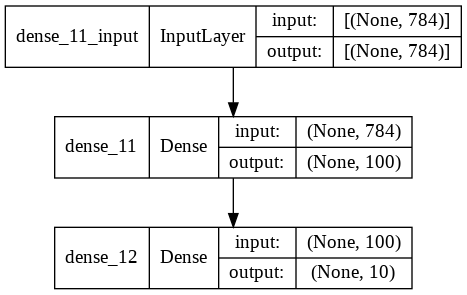

In [47]:
keras.utils.plot_model(model, "model.png", show_shapes=True)

#### Training

First we need to load some data to train our model with

In [48]:
# Loading the Mnist dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

#### Compiling the Model

To train a model with fit(), you need to specify a **loss function, an optimizer, and optionally, some metrics to monitor**.

You pass these to the model as arguments to the [compile](https://keras.io/api/losses/probabilistic_losses/#binarycrossentropy-class)() method.

*   The loss argument is a callable with arguments loss_fn(y_true, y_pred,sample_weight=None). The compile function can also accept some defined string arguments such as: "*mean_absolute_error*", "*mean_squared_error*", "*binary_crossentropy*"...
*   Similarly, the optimizer argument can also accept "*adam*", "*sgd*"...
*   The metrics argument should be a list -- your model can have any number of metrics.


In [49]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=32, epochs=15, validation_split=0.2)

Epoch 1/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3310 - accuracy: 0.9053 - val_loss: 0.1962 - val_accuracy: 0.9438
Epoch 2/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1667 - accuracy: 0.9518 - val_loss: 0.1474 - val_accuracy: 0.9572
Epoch 3/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1180 - accuracy: 0.9661 - val_loss: 0.1221 - val_accuracy: 0.9628
Epoch 4/15
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0891 - accuracy: 0.9742 - val_loss: 0.1055 - val_accuracy: 0.9692
Epoch 5/15
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0704 - accuracy: 0.9799 - val_loss: 0.0939 - val_accuracy: 0.9720
Epoch 6/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0556 - accuracy: 0.9845 - val_loss: 0.0978 - val_accuracy: 0.9710
Epoch 7/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0437 - accuracy: 0.9882 - val_loss: 0.0936 - val_accuracy:

Let's visualise the convergence

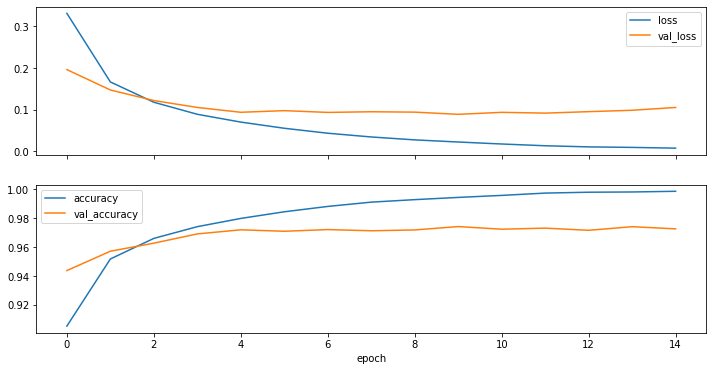

In [50]:
import pandas as pd

history_df = pd.DataFrame(history.history)
history_df["epoch"] = history.epoch

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(12, 6))
history_df.plot(x="epoch", y=["loss", "val_loss"], ax=ax0)
history_df.plot(x="epoch", y=["accuracy", "val_accuracy"], ax=ax1);

In [51]:
test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 - 1s - loss: 0.0935 - accuracy: 0.9737 - 917ms/epoch - 3ms/step
Test loss: 0.09349572658538818
Test accuracy: 0.9736999869346619


#### Exercise 2 : Impact of the Optimiser



1.   Try replacing the value of the learning rate by 0.01 or 0.001. What happens ?
2.   Try increasing the learning rate until the model diverge. At what lr does the model diverge ?
3.   Try adding Nesterov Momentum with a value of 0.8 to SGD. How many epochs does it need to converge ?



In [52]:
!keras.optimizers.SGD?

In [53]:
# TODO: Put your code here
# TODO: end

In [54]:
# TODO: Put your code here
# TODO: end

In [55]:
# TODO: Put your code here
# TODO: end

In [56]:
# %load Corrections/keras_corr_4.py

In [57]:
# %load Corrections/keras_corr_5.py

In [58]:
# %load Corrections/keras_corr_6.py

4. Replace SGD by Adam optimizer and run it


In [59]:
# TODO: Put your code here
# TODO: end

In [60]:
# %load Corrections/keras_corr_7.py

#### Exercise 3 : Simple MNIST LeNet (Convolutional Networks)

[Y. Lecun, 1998](https://ieeexplore.ieee.org/abstract/document/726791)

    
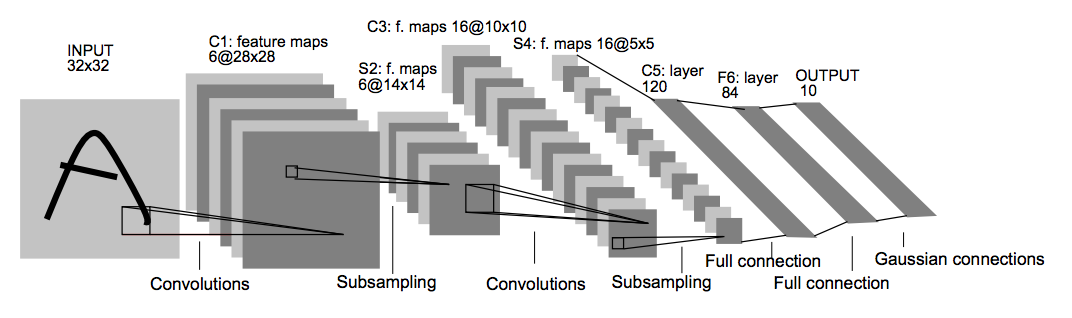




1.   Image Input: 28 (height) x 28 (width) x 1 (channel) 
2.   Convolution with 5x5 kernel + padding: 28x28x6 \[sigmoid activation\]
3.   Pooling with 2x2 average kernel: 14x14x6
4.   Convolution with 5x5 kernel (no padding): 10x10x16 \[sigmoid activation\]
5.   Pooling with 2x2 average kernel: 5x5x16
6.   Flatten
7.   Dense: 120 fully connected neurons \[sigmoid activation\]
8.   Dense: 84 fully connected neurons \[sigmoid activation\]
9.   Dense: 10 fully connected neurons \[softmax activation\]
10.  Output: 1 out of 10 classes




In [65]:
# Loading the Mnist dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

170508288/170498071 [==============================] - 2s 0us/step


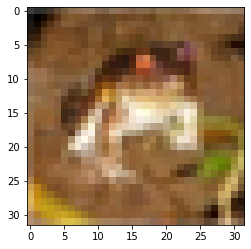

In [80]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [71]:
x_train.shape

(50000, 32, 32, 3)

In [66]:
x_train.max()

1.0

In [81]:
# TODO: your code goes here [You can use either API for this model]

lenet = keras.Sequential()
lenet.add(layers.Conv2D(filters=6, kernel_size=(5, 5), padding="same", activation='relu', input_shape=(32, 32, 3)))
lenet.add(layers.MaxPooling2D())

lenet.add(layers.Conv2D(filters=16, kernel_size=(5, 5), padding="valid", activation='relu'))
lenet.add(layers.MaxPooling2D())

lenet.add(layers.Flatten())

lenet.add(layers.Dense(units=120, activation='relu'))

lenet.add(layers.Dense(units=84, activation='relu'))

lenet.add(layers.Dense(units=10, activation = 'softmax'))

# TODO: end

In [97]:
conv1 = lenet.layers[0]

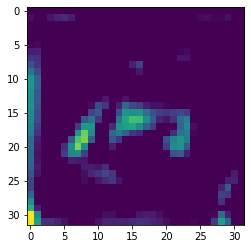

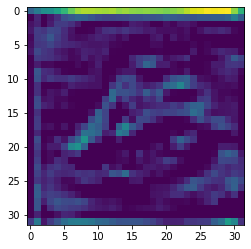

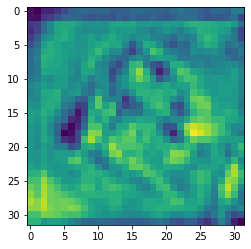

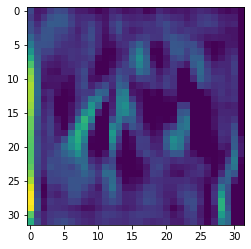

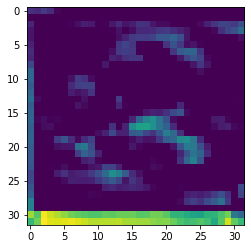

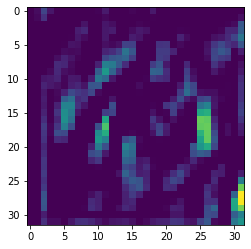

In [124]:
for i in range(6):
  plt.imshow(conv1(x_train[0].reshape([-1, 32, 32, 3]))[0, :, :, i])
  plt.show()

In [103]:
w = conv1.weights[0]

In [104]:
w.shape

TensorShape([5, 5, 3, 6])

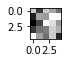

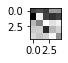

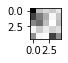

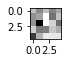

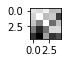

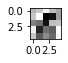

In [117]:
for i in range(w.shape[3]):
  plt.subplot(6, 1, i + 1)
  plt.imshow(w[:, :, 0, i], cmap='Greys_r')
  plt.show()


In [105]:
conv1.weights[1].shape

TensorShape([6])

In [82]:
# %load Corrections/keras_corr_8.py

In [83]:
lenet.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 6)        0         
 )                                                               
                                                                 
 conv2d_10 (Conv2D)          (None, 12, 12, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 576)               0         
                                                                 
 dense_25 (Dense)            (None, 120)             

In [88]:
lenet.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"],
)

history = lenet.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 6s 8ms/step - loss: 1.2292 - accuracy: 0.5609 - val_loss: 1.2153 - val_accuracy: 0.5707
Epoch 2/10
625/625 [==============================] - 5s 8ms/step - loss: 1.1470 - accuracy: 0.5942 - val_loss: 1.2086 - val_accuracy: 0.5732
Epoch 3/10
625/625 [==============================] - 5s 8ms/step - loss: 1.0857 - accuracy: 0.6134 - val_loss: 1.1755 - val_accuracy: 0.5851
Epoch 4/10
625/625 [==============================] - 5s 8ms/step - loss: 1.0321 - accuracy: 0.6346 - val_loss: 1.1208 - val_accuracy: 0.6049
Epoch 5/10
625/625 [==============================] - 5s 8ms/step - loss: 0.9698 - accuracy: 0.6559 - val_loss: 1.0809 - val_accuracy: 0.6220
Epoch 6/10
625/625 [==============================] - 5s 7ms/step - loss: 0.9267 - accuracy: 0.6711 - val_loss: 1.0690 - val_accuracy: 0.6310
Epoch 7/10
625/625 [==============================] - 5s 7ms/step - loss: 0.8828 - accuracy: 0.6880 - val_loss: 1.1245 - val_accuracy: 0.6170
Epoch 

In [89]:
test_scores = lenet.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 - 1s - loss: 1.1149 - accuracy: 0.6300 - 989ms/epoch - 3ms/step
Test loss: 1.1148988008499146
Test accuracy: 0.6299999952316284


In [90]:
y_pred=lenet(np.expand_dims(x_test[0], 0))
y_pred.shape

TensorShape([1, 10])

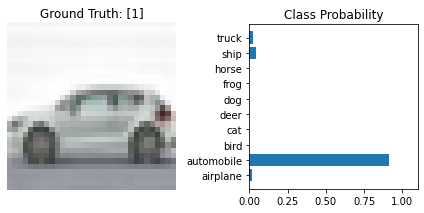

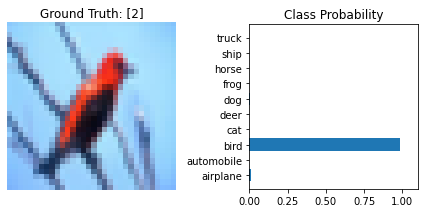

In [129]:
import random
import matplotlib.patches as patches
import tensorflow as tf

def test_model(x_test, y_test, model):
    n =  random.randint(0, x_test.shape[0])
    x = np.expand_dims(x_test[n], 0)
    y_pred=model(x)


    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.set_title('Ground Truth: {}'.format(y_test[n]))
    ax1.imshow(x_test[n], "Greys")
    ax1.axis('off')
    ax2.barh(np.arange(10), tf.squeeze(y_pred))
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(y_cifar_labels)
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

test_model(x_test, y_test, lenet)
test_model(x_test, y_test, lenet)

In [92]:
y_cifar_labels = ['airplane',								
'automobile',								
'bird',										
'cat',									
'deer', 										
'dog',									
'frog',									
'horse',										
'ship',										
'truck']